# Praca domowa z ML numer 7

<a href="https://colab.research.google.com/github/tomczj/ML24_25/blob/main/Gradient_Boosting_Methods/homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

Na początku zajmiemy się rozpisaniem poszczególnych podejść. Zaczniemy od pierwszego kroku, to znaczy będziemy szukać 
$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda),
$$
gdzie 
$$

L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$
oraz $y_i \in \{0,1\}$ są oznaczeniami klas, a $\sigma(z) = \frac{1}{1 + e^{-z}}$.

# Szukanie $\lambda^*$ dla scenariusza A
Policzymy pochodną i znajdziemy miejsce zerowe. Przyjmiemy (zgodnie z poleceniem), że mamy $m$ jedynek i $k$ zer. Wobec tego
$$
\sum_{i=1}^n L(y_i, \lambda) = -m \log(\sigma(\lambda)) - k \log(1 - \sigma(\lambda)).
$$
Zanim przejdziemy do policzenia całej pochodnej zauważmy, że $\sigma'(z) = \sigma(z)(1 - \sigma(z))$. Istotnie

\begin{align*}
    \Big(\frac{1}{1 + e^{-z}}\Big)' &= \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} = \sigma(z)(1 - \sigma(z)).
\end{align*}
Wobec tego możemy zapisać

\begin{align*}
\frac{dL}{dz} &= -y \cdot \frac{1}{\sigma(z)} \cdot \sigma'(z) - (1-y) \cdot \frac{1}{1-\sigma(z)} \cdot (-\sigma'(z)) \\
&= -y \frac{\sigma'(z)}{\sigma(z)} + (1-y) \frac{\sigma'(z)}{1-\sigma(z)} =\sigma'(z) \left( -\frac{y}{\sigma(z)} + \frac{1-y}{1-\sigma(z)} \right).
\end{align*}

Korzystając z tego, że wiemy ile wynosi $\sigma'(z)$ możeny zapisać

\begin{align*}
\frac{dL}{dz} &= \sigma(z)(1-\sigma(z)) \left( -\frac{y}{\sigma(z)} + \frac{1-y}{1-\sigma(z)} \right) = (1-\sigma(z))(-y) + \sigma(z)(1-y) \\
&= -y + y\sigma(z) + \sigma(z) - y\sigma(z) = -y + \sigma(z).
\end{align*}

A stąd dostajemy już następujące

$$
\boxed{ \frac{dL}{dz} = \sigma(z) - y }.
$$

Możemy teraz przejść do wyznaczenia $\lambda^*$. Korzystając z wcześniej przyjętego założenia mamy

$$
\sum_{i=1}^n L(y_i, \lambda) = -m \log(\sigma(\lambda)) - k \log(1 - \sigma(\lambda)).
$$
Różniczkując po $\lambda$ i korzystając ze wzoru na pochodną $L$ po $z$ dostajemy

\begin{align*}
\frac{d}{d\lambda} \left( -m \log(\sigma(\lambda)) - k \log(1 - \sigma(\lambda)) \right)
&= m (\sigma(\lambda) - 1) + k \sigma(\lambda) \\
&= (m+k) \sigma(\lambda) - m \\
&= (m + k) \sigma(\lambda) - m.
\end{align*}

Przyrównująć pochodną do zera mamy

\begin{align*}
\frac{1}{1+e^{-\lambda^*}} = \frac{m}{k + m} \iff e^{-\lambda^*} &= \frac{k}{m} \iff \lambda^* = \log\left( \frac{m}{k} \right)
\end{align*}

Łatwo teraz zauważyć, że 
$$
\frac{d}{d\lambda} \left( -m \log(\sigma(\lambda)) - k \log(1 - \sigma(\lambda)) \right) > 0 \iff \lambda >  \log\left( \frac{m}{k} \right)
$$

oraz 
$$
\frac{d}{d\lambda} \left( -m \log(\sigma(\lambda)) - k \log(1 - \sigma(\lambda)) \right) < 0 \iff \lambda < \log\left( \frac{m}{k} \right)
$$
więc w $\log\left( \frac{m}{k} \right)$ nasza funckja ma minimum.

Warto się tutaj dokładnie przyjrzeć temy wynikowi. Przyjmijmy $p = \frac{m}{m + k}$. Wówczas 
$$
\log\left( \frac{m}{k} \right) = \log\left( \frac{\frac{m}{m + k}}{\frac{k}{m + k}} \right) = \log\left( \frac{p}{1 - p} \right) = \sigma^{-1}(p).
$$
Łatwo tutaj zauważyć, że mamy do czynienia z $logitem$. Gdzie $p$ jest niczym innym jak częścią obserwacji z grupy $1$ względem wszystkich obserwacji lub innaczej prawdopodobieństwem wystąpienia lableka 1 w naszym zbiorze danych.


# Szukanie $\lambda^*$ dla scenariusza B

Jesteśmy w $m$ - tym korku i mamy jakiś predyktor $f_i = f_{m- 1}(x_i)$ chcemy znaleźć

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$

Przypomnijmy, że wcześniej wyprowadziliśmy pochodną funkcji $L(y,z)$ względem $z$ i wynosi ona:
$$
\frac{dL}{dz} = \sigma(z) - y.
$$

Teraz, zamiast rozważać bezpośrednio $z = \lambda$, mamy $z = f_i + \lambda$.

Całkowita funkcja straty to
$$
\sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$

Zróżniczkujmy po $\lambda$:
\begin{align*}
\frac{d}{d\lambda} \sum_{i=1}^n L(y_i, f_i + \lambda) &= \sum_{i=1}^n \frac{dL}{dz}(y_i, f_i + \lambda) \cdot \frac{d(f_i + \lambda)}{d\lambda}.
\end{align*}

Ponieważ
$$
\frac{d(f_i + \lambda)}{d\lambda} = 1,
$$
to mamy
$$
\frac{d}{d\lambda} \sum_{i=1}^n L(y_i, f_i + \lambda) = \sum_{i=1}^n \left( \sigma(f_i + \lambda) - y_i \right).
$$
Aby znaleźć minimum, rozwiązujemy
$$
\sum_{i=1}^n \left( \sigma(f_i + \lambda) - y_i \right) = 0,
$$
czyli
$$
\sum_{i=1}^n \sigma(f_i + \lambda) = \sum_{i=1}^n y_i.
$$

Ponieważ $\sum_{i=1}^n y_i = m$ (liczba jedynek w zbiorze), to mamy
$$
\boxed{ \sum_{i=1}^n \sigma(f_i + \lambda) = m }
$$

Jak widać to równanie jest nieliniowe ze wględnu na $\lambda$, co wynika z nieliniowości funkcji $\sigma(z)$. Istotnie, w przypadku gdy w zbiorze nie mamy tylko takich samych predykcji to to rówananie trzeba rozwiązać numerycznie.

$$
\sum_{i=1}^n \sigma(f_i + \lambda) = \sum_{i=1}^n \frac{1}{1 + e^{f_i + \lambda}} = m
$$
Możemy zastosować podstawienie $y = e^{\lambda}$ i wówczas to równanie przyjumje postać
$$
\sum_{i=1}^n \frac{1}{1 + a_iy} = m
$$
dla pewnych nieujemnych $a_i$ i szukamy rozwiązania dla $y > 0$.

## Symulacja $\textit{krajobrazu}$ funkcji straty.

In [ ]:
# ustalamy k i m wspólne dla obu scenariuszy
k = 500
m = 1000
n = k + m

#wartości lambd, które zostaną wykorzystane do wykresów
lambda_vals = np.linspace(-10, 10, 1000)

target_variables = np.array(k * [0] + m * [1])

#sigmoida
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Scenariusz A

In [3]:
# Definicja funkcji straty dla scenariusza A
def loss_A(lambdas):
    #tutaj możemy zrobić wektorowo
    s = sigmoid(lambdas)
    return -m * np.log(s) - k * np.log(1 - s)

# optymlane lambda, które wyliczyliśmy wcześniej
lambda_star = np.log(m / k)
loss_vals_A = [loss_A(l) for l in lambda_vals]

### Scenariusz B

In [4]:
np.random.seed(439669)
#Definicja dla scenariusza B, gdy jesteśmy już w m-tym kroku
def loss_B(lambdas, predictions, target_variables):
    #dla jednej lambdy i wielu predykcji
    s = sigmoid(lambdas + predictions)

    #definiujemy listę
    values = - target_variables * np.log(s) - (1 - target_variables) * np.log(1 - s)
    #strata jest sumą wartości
    return np.sum(values)

predictions = np.random.normal(0, 5, size = n)
loss_vals_B = [loss_B(lambdas, predictions, target_variables) for lambdas in lambda_vals]

# Znajdowanie minimum numerycznie dla funkcji straty B
result = minimize_scalar(lambda lam: loss_B(lam, predictions, target_variables), bounds=(-5, 5), method='bounded')
lambda_star = result.x

### Wykresy

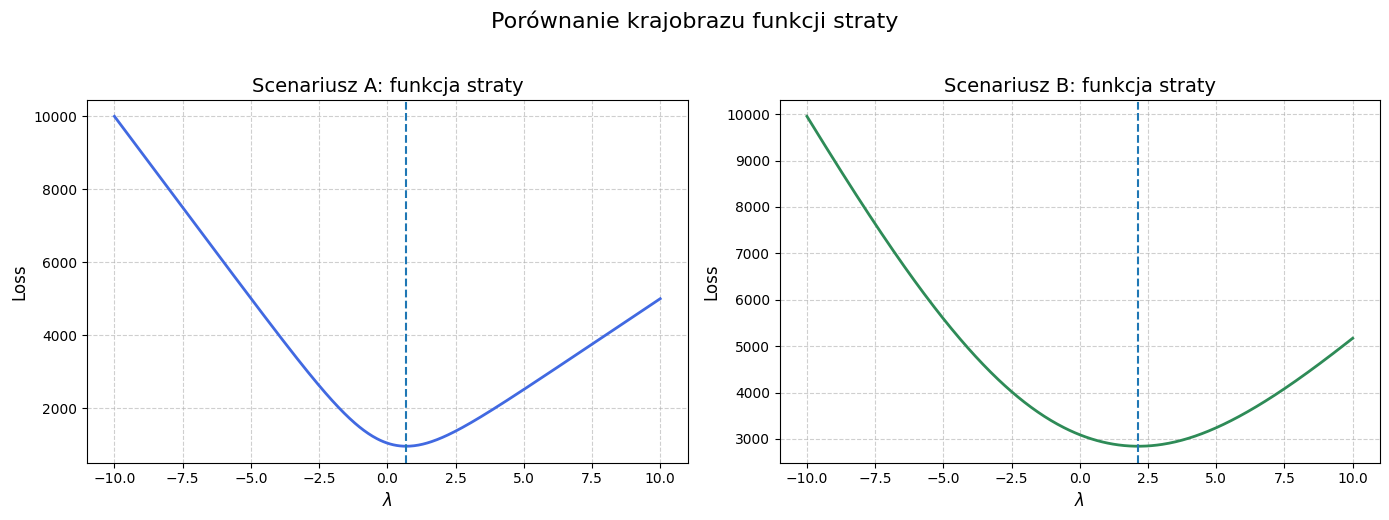

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres dla loss_A
axes[0].plot(lambda_vals, loss_vals_A, color='royalblue', lw=2)
axes[0].set_title('Scenariusz A: funkcja straty', fontsize=14)
axes[0].set_xlabel(r'$\lambda$', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].axvline(np.log(m/k), linestyle = '--')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Wykres dla loss_B
axes[1].plot(lambda_vals, loss_vals_B, color='seagreen', lw=2)
axes[1].set_title('Scenariusz B: funkcja straty', fontsize=14)
axes[1].set_xlabel(r'$\lambda$', fontsize=12)
axes[1].axvline(lambda_star, linestyle = '--')
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Estetyka
fig.suptitle('Porównanie krajobrazu funkcji straty', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

Jak widać wyniki są dosyć ciekawe. Wykres w scenariuszu B jest zbliżony do tego co w przypadku A - ma tylko mniejsze nachylenie. Co ciekawe, pomimo nieliniowości mamy w scenariuszu B tylko jedno minimum, a krzywa jest gładka - początkowo mogło się wydawać, że uzyska się inny wynik. W szczególności, zarówno w scenariuszu A jak i B obserwujemy tylko jeden $\textit{garb}$. Ponadto, w scenariuszu B możliwe jest numeryczne znalezienie minimum (co zostało wykonane i oznaczone przerywaną pionową linią). Warto zauważyć, że zatem trudność związana z wyznaczeniem mimimum nie jest ukryta w krajobrazie (wykresie) funckji straty B a w nieliniowej zależności od $\lambda$. 

### Podsumowanie (odpowiedzi na pytania)

W przypadku scenariusza A znalezienie minimum jest łatwe i można to zrobić algebraicznie (licząc pochodną i przyrównując ją do zera). Uzyskujemy wtedy ciekawy wynik, bowiem punkt w którym funkcja straty przyjmuje minimum to stosunek obserwacji o labelu 1 do obsewrwacji o labelu 0. Po krótkich przejściach pokazaliśmy, że jest to nic innego jak $\textit{logit}$ od $p = \frac{m}{m + k}$. 

Przeanalizowaliśmy również scenariusz B. Był on bardziej skomplikowany, ponieważ nie udało się w łatwy sposób wyznaczyć optymalnej $\lambda$. Pokazaliśmy jednak jakie równanie musi być spełnione przez taką lambdę. Problem krył się w nieliniowej zależności w tym równaniu, co spowodowane jest tym jak wygląda sigmoida oraz uwzględnieniem predykcji $f_i$.

Pokazaliśmy jednak, że wykresy w obu scenariuszach są do siebie zbliżone. Spodziewaliśmy się skomplikowanej struktury wykresu funkcji B, ale okazało się innaczej. W scenariuszu B wykres miał tylko jedno minimum (tak jak w przypadku scenariusza A). Dzięki temu byliśmy w stanie wyznaczyć (numerycznie) miejsce zerowe. W obu przypadkach wykresy były gładkie, a ich kształt bardzo zbliżony (w scenariuszu B funkcja straty miała delikatniejsze nachylenie) i ksztłtem przypominał $U$.